In [60]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby
import copy

In [61]:
# Генеруємо граф
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)

    return G

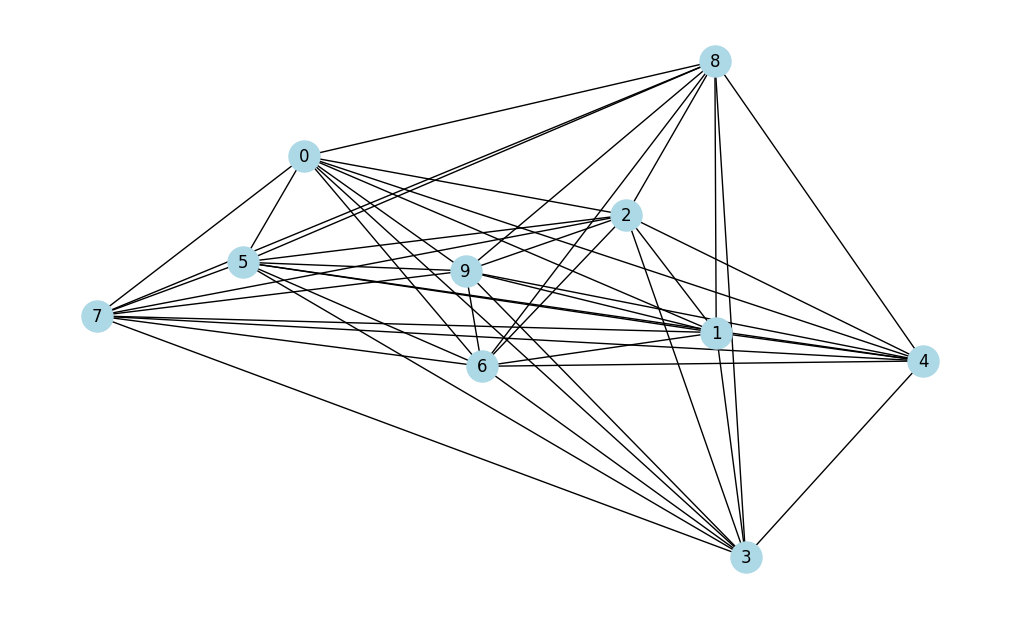

In [62]:
G = gnp_random_connected_graph(10, 1, False, True)

Kruskal's algorithm

In [63]:
from networkx.algorithms import tree

In [64]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

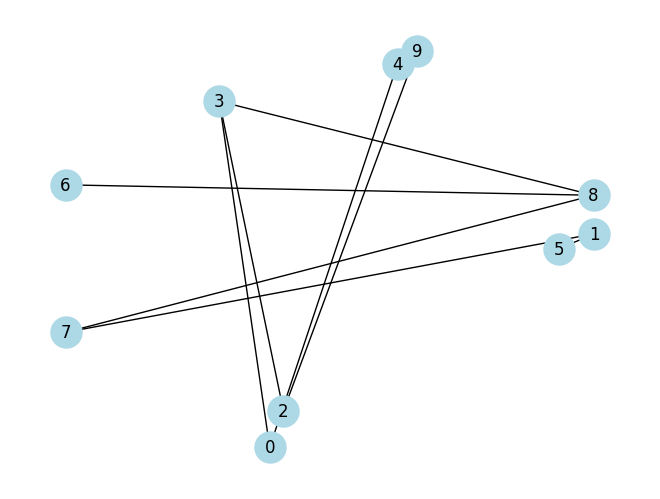

In [65]:
nx.draw(mstk, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [66]:
mstk.edges(), len(mstk.edges())
# [(0, 6), (1, 8), (2, 3), (4, 6), (5, 6), (6, 7), (6, 8), (6, 9)] 33

(EdgeView([(0, 3), (0, 4), (1, 7), (1, 5), (2, 9), (2, 3), (3, 8), (6, 8), (7, 8)]),
 9)

My implementation

In [67]:
(generated_edges_list := list(G.edges(data=True)))

[(0, 4, {'weight': -3}),
 (0, 1, {'weight': 15}),
 (0, 2, {'weight': 8}),
 (0, 3, {'weight': -4}),
 (0, 5, {'weight': 20}),
 (0, 6, {'weight': 18}),
 (0, 7, {'weight': 13}),
 (0, 8, {'weight': 12}),
 (0, 9, {'weight': 10}),
 (1, 9, {'weight': 6}),
 (1, 2, {'weight': 7}),
 (1, 3, {'weight': 14}),
 (1, 4, {'weight': 12}),
 (1, 5, {'weight': 1}),
 (1, 6, {'weight': 17}),
 (1, 7, {'weight': -1}),
 (1, 8, {'weight': 5}),
 (2, 3, {'weight': -1}),
 (2, 4, {'weight': 15}),
 (2, 5, {'weight': 12}),
 (2, 6, {'weight': 16}),
 (2, 7, {'weight': 14}),
 (2, 8, {'weight': 11}),
 (2, 9, {'weight': -3}),
 (3, 7, {'weight': 1}),
 (3, 4, {'weight': 7}),
 (3, 5, {'weight': 3}),
 (3, 6, {'weight': 16}),
 (3, 8, {'weight': -1}),
 (3, 9, {'weight': 0}),
 (4, 9, {'weight': 12}),
 (4, 5, {'weight': 2}),
 (4, 6, {'weight': 18}),
 (4, 7, {'weight': 0}),
 (4, 8, {'weight': 3}),
 (5, 6, {'weight': 18}),
 (5, 7, {'weight': 12}),
 (5, 8, {'weight': 2}),
 (5, 9, {'weight': 11}),
 (6, 7, {'weight': 12}),
 (6, 8, {'wei

In [68]:
def got_my_implement_graph(generated_edges_list):
    """
    Я запізно побачила ваш док, тому переписую перетворення ваших даних у свої
    """
    result = []
    current_vertex = None
    current_list = []

    for edge in generated_edges_list:
        source, target, data = edge
        if source != current_vertex:
            if current_vertex is not None:
                result.append(current_list)
            current_vertex = source
            current_list = [source]

        current_list.append(f'{target}:{data["weight"]}')

    result.append(current_list)
    return result

In [69]:
def chose_next_edge(graph_dict):
    """
    Обираємо наступну вершину, вилучаємо її з переліку ребер
    Певртаємо оновлений список ребер, початкову і кінцеві вершини,
    вагу цієї вершини
    """
    graph_dict = [el for el in graph_dict if len(el) > 1]
    # почистили порожні вершини
    pretend_new_weight = [int(el[1].split(':')[1]) for el in graph_dict]
    #мінімальні ваги з кожної вершини
    new_weight = min(pretend_new_weight) #результуюча мінімальна вага
    fir_vertex = pretend_new_weight.index(new_weight)
    #номер вершини, у якій знаходиться ця рез.мін.вага
    sec_vertex = int(graph_dict[fir_vertex][1].split(':')[0]) #номер вершини, куди ми рухаємось
    graph_dict[fir_vertex] = [graph_dict[fir_vertex][0]] + graph_dict[fir_vertex][2:]
    #вилучаємо пройдену вершину
    return graph_dict, fir_vertex, sec_vertex, new_weight

In [70]:
def kruskal_algo(graph_dict):
    """
    Допоки усі наші ребра не з'єднаються в одну множину розбиття,
    знаходимо наступний крок, використовуючи chose_next_edge
    Додаємо її в кінцевий маршут, якщо вона не утворила замкнений цикл
    """
    graph_weight = 0
    framework = []
    breaking = [[el] for el in range(len(graph_dict))] # 0 iteration
    # надалі ми переноситимо число як репрезентацію елемента, якщо після перенесення
    # наше значення не змінилось, то останній наш вибір припав на ребро, що створить цикл
    # тому ми не додаємо його ваги до ваги графа
    second = 0
    while len(breaking) > 1: #продовжуємо, допоки розбиття не складатиметься
        # з одного елемента, тобто це якраз множина всіх вершин
        (func_res := chose_next_edge(graph_dict))
        graph_dict = func_res[0] #оновили словник
        check_first, check_second = False, 0 #призначили початкові значення
        new_breaking = copy.deepcopy(breaking)
        for part in new_breaking: #шукаємо де у нас початковий і кінцевий елементи ребра
            if func_res[1] in part and func_res[2] in part: #якщо обидва значення в одному розподілі
                # тобто цей хід створить цикл
                check_first, check_second = True, 2
            elif func_res[1] in part: #якщо це те, що ми маємо пересувати
                transfer = part #копіюємо всі значення цієї часки розбиття
                first = new_breaking.index(part)
                # new_breaking.remove(part) #вилучаємо це місце розбиття
                check_first = True #кажемо, що маємо що перенести
                # print(new_breaking)
            elif func_res[2] in part: #це наша інша вершину, у яку нам потрібно перенестись
                # тут можливі 2 варіанти: ми вже маємо що переносити, але ще не маємо
                if check_first: #це кращий з 2х варіантів - ми маємо що перенести
                    # залишається перевірити чи ми не утворимо цикл(тому ми проходимось по всіх
                    # елементах) списку перенесення, і перевіряємо чи елемент не є вже в списку
                    if any([True for el in transfer if el in part]):
                        # тут у нас утворився цикл
                        check_second = 2 #тобто на цій ітерації утвориться цикл, якщо ми її
                        # утвердимо, тому даєм значення 2, щоб воно було True і ми не
                        # заходили сюди ще раз з думкою, що ми не перенесли дані, бо
                        # послідовність першої і другої вершин були незручні
                    else:
                        # тут наш найкращй приклад: перше ребро у розбиттях було раніше, ніж друге
                        #  - коли ми можемо повноцінно діяти
                        part.extend(transfer) #додали до цього розбиття наше перенесення
                        graph_weight += func_res[3] #додали вагу ребра до ваги графа
                        check_second = 1 #у цьому випаку ми оновлюємо значення розподілу
                        framework.append((func_res[1], func_res[2]))
                else:
                    second = new_breaking.index(part) #ми запам'ятовуємо який індекс мав наш розпоід
                    # з крайнім елементом і потім повернемось, щоб сьоди додати наші
                    # перенесені елементи не буде проблем з індекс аут оф рендж, бо видаляємо
                    # ми елемнт, який є далі по списку, тому цей індекс існуватиме
        if not check_second: #це якраз наш випадок, коли ми маємо вже що додати,
            # знаємо куди його додати, залишається лише це зробити
            if not any([True for el in transfer if el in new_breaking[second]]):
                # перевіряємо чи не створимо цикл
                new_breaking[second].extend(transfer)
                #додаємо транспортовані елементи у правильний розподіл
                graph_weight += func_res[3] #додаємо вагу ребра
                check_second = 1 #щоб змінити значення розподілів, бо це правильний варіант
                framework.append((func_res[1], func_res[2]))
        if check_first and check_second == 1: #якщо ми малми що перенести і це зробили
            # то змінюємо минуле значення розбиття на поточне, інакше розбиття
            # не міняється
            new_breaking.pop(first) #вилучаємо вже перенесене
            breaking = new_breaking
    framework = sorted(framework, key=lambda x:(x[0], x[1]))
    # print(framework, graph_weight)

    return framework, graph_weight

In [71]:
(graph_dict := got_my_implement_graph(generated_edges_list))
# kruskal_algo(graph_dict)

[[0, '4:-3', '1:15', '2:8', '3:-4', '5:20', '6:18', '7:13', '8:12', '9:10'],
 [1, '9:6', '2:7', '3:14', '4:12', '5:1', '6:17', '7:-1', '8:5'],
 [2, '3:-1', '4:15', '5:12', '6:16', '7:14', '8:11', '9:-3'],
 [3, '7:1', '4:7', '5:3', '6:16', '8:-1', '9:0'],
 [4, '9:12', '5:2', '6:18', '7:0', '8:3'],
 [5, '6:18', '7:12', '8:2', '9:11'],
 [6, '7:12', '8:-1', '9:18'],
 [7, '9:17', '8:-1'],
 [8, '9:6']]

Timetesting

In [72]:
import time
from tqdm import tqdm

In [73]:
your_time_n = []
my_time_n = []

your_time_density = []
my_time_density = []

In [74]:
def bild_function_time(n, density, list_to_append):
    NUM_OF_ITERATIONS = 1000
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(n, density, False)
        
        start = time.time()
        tree.minimum_spanning_tree(G, algorithm="kruskal")
        end = time.time()
        
        time_taken += end - start

    result = time_taken / NUM_OF_ITERATIONS
    list_to_append.append(result)    

In [75]:
def my_function_time(n, density, list_to_append):
    NUM_OF_ITERATIONS = 1000
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(n, density, False)
        
        start = time.time()
        kruskal_algo(graph_dict)
        end = time.time()
        
        time_taken += end - start

    result = time_taken / NUM_OF_ITERATIONS
    list_to_append.append(result)    

In [76]:
edges_number = [10, 50, 75, 100, 200]

for el in edges_number:
    bild_function_time(el, 0.4, your_time_n)
    my_function_time(el, 0.4, my_time_n)

density_pros = [0.1, 0.3, 0.5, 0.7, 0.9]
for el in density_pros:
    bild_function_time(50, el, your_time_density)
    my_function_time(50, el, my_time_density)

print (your_time_n)
print (my_time_n)
    
print (your_time_density)
print (my_time_density)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:08<00:00, 119.14it/s]

[0.00010879540443420411, 0.0010099551677703858, 0.004042741060256958, 0.011325592041015626, 0.05430391883850098]
[0.000130403995513916, 0.00019278645515441895, 0.0007003073692321778, 0.0006033937931060791, 0.0007742395401000977]
[0.0016167752742767335, 0.002651294708251953, 0.0036605134010314943, 0.0048510880470275875, 0.0061164710521698]
[0.0006353442668914795, 0.0006416175365447998, 0.0005480515956878662, 0.0007101819515228272, 0.0005852525234222412]


In [77]:
nodes = list(G.nodes())

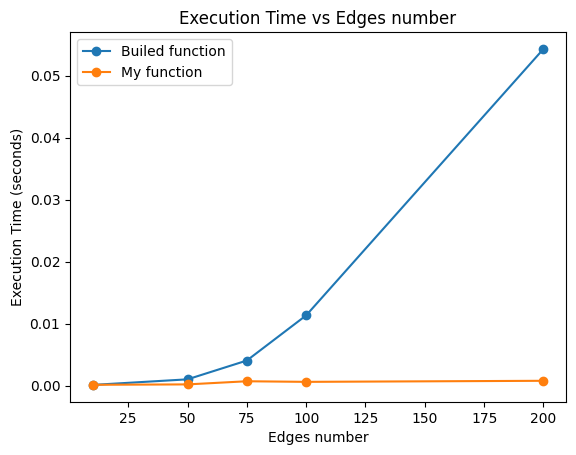

In [78]:
plt.plot(edges_number, your_time_n, marker='o', label='Builed function')
plt.plot(edges_number, my_time_n, marker='o', label='My function')

plt.xlabel('Edges number')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Edges number')
plt.legend()

plt.show()

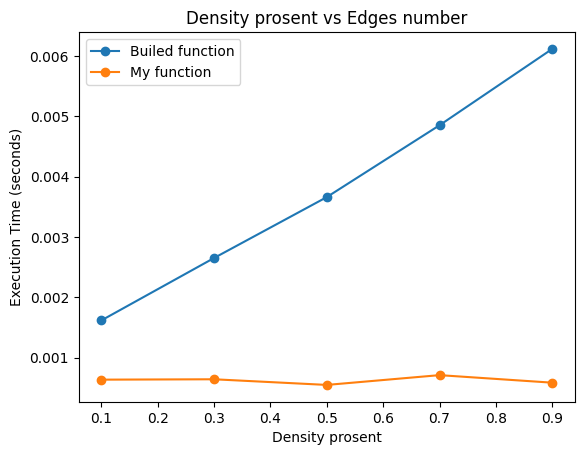

In [79]:
plt.plot(density_pros, your_time_density, marker='o', label='Builed function')
plt.plot(density_pros, my_time_density, marker='o', label='My function')

plt.xlabel('Density prosent')
plt.ylabel('Execution Time (seconds)')
plt.title('Density prosent vs Edges number')
plt.legend()

plt.show()